### Fill out:
Name & Surname: Jared Roff

Student ID: 34987444

## W5&W6 post studio exercises (time series, imputation)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to add comments in markdown cell after each exercise. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

Required files (download these from the Gitlab site into the same directory as the notebook on your computer):

* [traffic-data.csv](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/tree/main/Pandas-DataFrames/Time-Series/traffic-data.csv)

* [abalone.csv](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/blob/main/Machine-Learning/Imputation/abalone.csv) 

Once downloaded, run the following cells and use these dataframes in the exercises.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
# traffic data -Q1, Q2, Q5, Q6
raw_traffic_data = pd.read_csv("traffic-data.csv")

# Create a new index from the timestamp column, with the proper type.
traffic_data = raw_traffic_data.set_index(pd.to_datetime(raw_traffic_data["Timestamp"]))

# Delete the column with our old string representation of times.
traffic_data = traffic_data.drop(columns=["Timestamp"])

traffic_data = traffic_data.assign(
    Date=lambda df: df.index.floor("D"),
    TimeOfDay=lambda df: df.index - df.Date,
    DayOfWeek=lambda df: df.index.day_name().astype("category"),
)

Abalone dataset - This consists of physical measurements of abalones from the Tasmanian coast in the 1990s, in an effort to determine their age. Previously the age would need to be determined in the laboratory by counting the number of rings in the shell. Relationship used to determine age is: 
*Age* = *# of rings + 1.5*. 

This is a complete dataset, however we will randomly remove entries in two columns to perform imputation.

First we load the dataset.

In [3]:
abalone = pd.read_csv("abalone.csv")
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


The Sex field has three categorical entries: Male (M), Female (F) and Infant (I). Se we need to **one-hot encode** these fields to create three binary columns (encode categorical features to equivalent numerical information).

In [4]:
dummy = pd.get_dummies(abalone['Sex'])
abalone = pd.concat([abalone, dummy], axis=1)
abalone.drop(columns=['Sex'], inplace=True)
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,True,False


Lastly we create a features array (X_full) and a target array (Y), the target being Rings. Then we randomly remove 33% of the Height samples and 25% of the Shell weight samples from the features array to get X_rm.

In [5]:
X_full = abalone.drop(columns=['Rings'])
Y = abalone[['Rings']]

X_rm = X_full.copy()
X_rm['Height'] = X_rm['Height'].sample(frac=0.67, random_state = 42)
X_rm['Shell weight'] = X_rm['Shell weight'].sample(frac=0.75, random_state = 64)

#X_rm.describe()

### Exercise 1 (Filtering - traffic_data)

Plot only the data (from the full day) for 18th January 2021 for Site 107 as a line plot. What is the busiest period of the day? Are there any issues with this data? Show data between 1pm and 3p and comment on the values.

In [6]:
raw_traffic_data = pd.read_csv("traffic-data.csv")
raw_traffic_data

traffic_data = raw_traffic_data.set_index(pd.to_datetime(raw_traffic_data["Timestamp"]))

# Delete the column with our old string representation of times.
traffic_data = traffic_data.drop(columns=["Timestamp"])

# Show the index and the dataframe.
print(traffic_data.index)
traffic_data

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 00:15:00',
               '2021-01-01 00:30:00', '2021-01-01 00:45:00',
               '2021-01-01 01:00:00', '2021-01-01 01:15:00',
               '2021-01-01 01:30:00', '2021-01-01 01:45:00',
               '2021-01-01 02:00:00', '2021-01-01 02:15:00',
               ...
               '2021-01-31 21:30:00', '2021-01-31 21:45:00',
               '2021-01-31 22:00:00', '2021-01-31 22:15:00',
               '2021-01-31 22:30:00', '2021-01-31 22:45:00',
               '2021-01-31 23:00:00', '2021-01-31 23:15:00',
               '2021-01-31 23:30:00', '2021-01-31 23:45:00'],
              dtype='datetime64[ns]', name='Timestamp', length=2976, freq=None)


,Site 100,Site 101,Site 102,Site 103,Site 105,Site 106,Site 107,Site 108,Site 109
Timestamp,,,,,,,,,
2021-01-01 00:00:00,66.0,18.0,46.0,19.0,97.0,39.0,66.0,31.0,51.0
2021-01-01 00:15:00,124.0,83.0,88.0,57.0,231.0,79.0,207.0,112.0,109.0
2021-01-01 00:30:00,121.0,102.0,83.0,91.0,252.0,96.0,272.0,106.0,143.0
2021-01-01 00:45:00,130.0,115.0,112.0,59.0,279.0,89.0,278.0,87.0,126.0
2021-01-01 01:00:00,160.0,115.0,107.0,49.0,226.0,86.0,235.0,98.0,111.0
...,...,...,...,...,...,...,...,...,...
2021-01-31 22:45:00,79.0,51.0,70.0,0.0,153.0,45.0,145.0,55.0,56.0
2021-01-31 23:00:00,94.0,44.0,40.0,0.0,148.0,31.0,134.0,54.0,43.0
2021-01-31 23:15:00,61.0,36.0,42.0,0.0,120.0,34.0,118.0,38.0,42.0


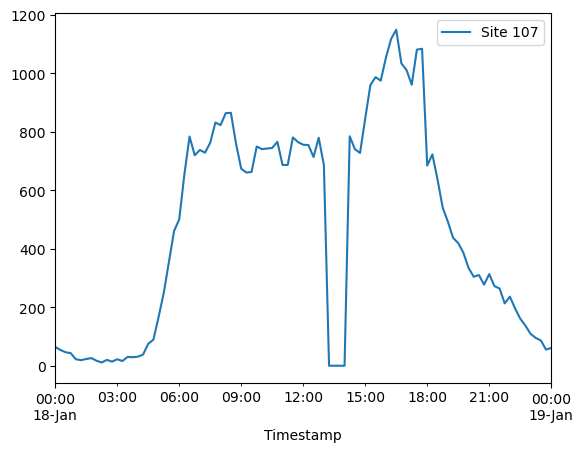

In [7]:
start = pd.Timestamp("2021-01-18 00:00:00") 
end = start + pd.Timedelta(hours=24)
morning_data_site = traffic_data.loc[start:end, ["Site 107"]] # Creating a new dataframe with the specific times
morning_data_site.plot.line();

The busiest part of the day is from 4:30-6:30pm with the peak being at 4:45. This makes sense as this would be when people are driving home from work. 

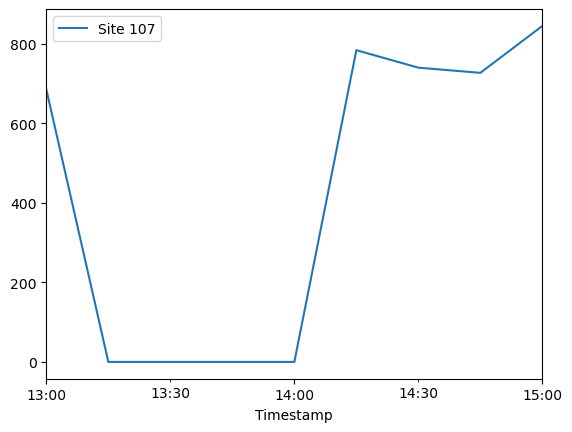

In [8]:
start = pd.Timestamp("2021-01-18 13:00:00")
end = start + pd.Timedelta(hours=2)
morning_data_site = traffic_data.loc[start:end, ["Site 107"]]
morning_data_site.plot.line();

In [9]:
morning_data_site.isna().sum() # Checking for missing values in the dataframe

Site 107    0
dtype: int64

Between 1:15 and 2:00 the graph tells us there are no cars that drive through, however this doesn't seem realistic meaning the data likely wasn't collected correctly, due to possibly a faulty sensor.

### Exercise 2 (Resampling - traffic_data)
Calculate and plot the number of cars seen in the busiest 15 minute period each day for Site 103 (i.e. the maximum of all 15 minute periods across each day). What do you observe?

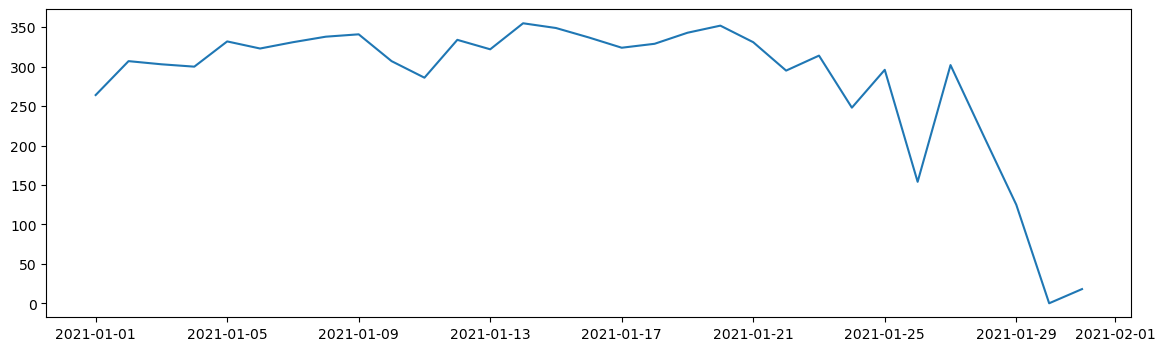

In [10]:
# Need to find maximum for each day and add to dataframe

# Grouping with groubpy (below I've done resampling as well)
site_103_data = traffic_data.loc[:,"Site 103"]

site_103_maxes = site_103_data.groupby(site_103_data.index.date).max()
site_103_maxes.plot(figsize = (14,4));

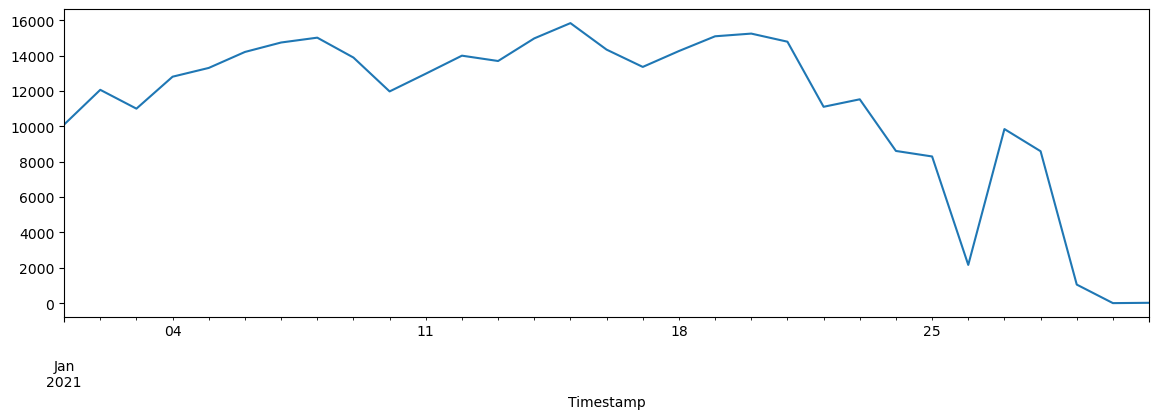

In [22]:
# Grouping with resampling instead
site_103_maxes_resample = site_103_data.resample("1D").sum()
site_103_maxes_resample.plot(figsize = (14,4));

### Exercise 3 (Imputing with mean or median - using X_rm based on abalone)
Consider the dataframe X_simple_imputer below.

For this dataframe:

- Show counts of missing data for all columns. 
- Impute the missing values in the Height column with its mean.
- Impute the missing values in the Shell weight column with its median.
- Show first 10 rows after imputation.
- Show counts of missing data after imputation.

In [12]:
X_simple_imputer = X_rm.copy()

X_simple_imputer.isna().sum() # Finds sum of missing data for each column

Length               0
Diameter             0
Height            1378
Whole weight         0
Shucked weight       0
Viscera weight       0
Shell weight      1044
F                    0
I                    0
M                    0
dtype: int64

In [13]:
X_simple_imputer.fillna(X_simple_imputer["Height"].mean(), inplace=True) # Replacing height with mean 

X_simple_imputer.fillna(X_simple_imputer["Shell weight"].median(), inplace=True) # Replacing shell weight with median

X_simple_imputer.head(10)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M
0,0.455,0.365,0.095000,0.5140,0.2245,0.1010,0.150000,False,False,True
1,0.350,0.265,0.139176,0.2255,0.0995,0.0485,0.070000,False,False,True
2,0.530,0.420,0.135000,0.6770,0.2565,0.1415,0.210000,True,False,False
3,0.440,0.365,0.139176,0.5160,0.2155,0.1140,0.155000,False,False,True
4,0.330,0.255,0.139176,0.2050,0.0895,0.0395,0.055000,False,True,False
5,0.425,0.300,0.139176,0.3515,0.1410,0.0775,0.139176,False,True,False
6,0.530,0.415,0.150000,0.7775,0.2370,0.1415,0.139176,True,False,False
7,0.545,0.425,0.125000,0.7680,0.2940,0.1495,0.260000,True,False,False
8,0.475,0.370,0.125000,0.5095,0.2165,0.1125,0.139176,False,False,True
9,0.550,0.440,0.139176,0.8945,0.3145,0.1510,0.320000,True,False,False


In [14]:
X_simple_imputer.isna().sum() # Finds new sum of missing data which should equal to zero

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
F                 0
I                 0
M                 0
dtype: int64

### Exercise 4 (kNN imputer - X_rm dataframe based on abalone)
Consider the dataframe X_kNN_imputer below. Utilise the kNN imputer with n_neighbors = 5 in order to fill in the missing values of X_kNN_imputer. As we have one hot encoded our data, we will use the MinMaxScaler from SciKit-Learn to normalise our data. After you have done your kNN imputation, please unnormalise your data afterwards!

Also show first 10 entries of the final dataframe.

In [28]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

X_kNN_imputer = X_rm.copy()
Y_kNN_imputer = Y.copy()

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Keep track of the columns
X_columns = X_kNN_imputer.columns 

# Instantiating the nearest neighbours using n_neighbours = 5
imputer = KNNImputer(n_neighbors=5)

# Now we normalise the data using the MinMaxScaler. The method used is fit_transform
X_kNN_imputer = pd.DataFrame(scaler.fit_transform(X_kNN_imputer), columns = X_columns)

# Performing the KNN on the data
X_kNN_imputer = pd.DataFrame(imputer.fit_transform(X_kNN_imputer), columns = X_columns)

# Using inverse_transform to unnormalise data afterward
X_kNN_imputer = pd.DataFrame(scaler.inverse_transform(X_kNN_imputer), columns=X_columns)

X_kNN_imputer.head(10).round(10)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0.0,0.0,1.0
1,0.350,0.265,0.094,0.2255,0.0995,0.0485,0.0700,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1.0,0.0,0.0
3,0.440,0.365,0.118,0.5160,0.2155,0.1140,0.1550,0.0,0.0,1.0
4,0.330,0.255,0.085,0.2050,0.0895,0.0395,0.0550,0.0,1.0,0.0
5,0.425,0.300,0.107,0.3515,0.1410,0.0775,0.0929,0.0,1.0,0.0
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.2503,1.0,0.0,0.0
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,1.0,0.0,0.0
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1583,0.0,0.0,1.0
9,0.550,0.440,0.145,0.8945,0.3145,0.1510,0.3200,1.0,0.0,0.0


## Extra exercises

The following exercises with (*) will not be assessed. Use these to check your understanding of topics covered in the past 2 weeks.

### Exercise 5* (Rolling - traffic_data)
Plot the 2-hourly rolling mean, over the first week of January for Site 109. What is the busiest day in this period?

### Exercise 6* (Pivot/aggregate - traffic_data)
Plot the maximum traffic seen in each 15 minute window of the day on any Monday in the dataset for any two sites. What is the busiest time of day on a Monday at the sites you have chosen?

### Exercise 7* (Distributions for different imouters - abalone)
Plot histograms of:

The distribution of the Height feature in the X_simple_imputer dataframe.
The distribution of the Shell weight feature in the X_simple_imputer dataframe.
The distribution of the Height feature in the X_kNN_imputer dataframe.
The distribution of the Shell weight feature in the X_kNN_imputer dataframe.

In [16]:
# Use the following command to set up a figure with 4 subplots.

# fig, axes = plt.subplots(2, 2, figsize=(10, 10));

### Exercise 8* (kNN imputer for regression model - abalone)
Below I have created a k-Nearest Neighbours Regression (not Classification!) model for the full dataset X_full and determined the R2 score of the model. Here I have chosen n_neighbours = 5 and I have used a 80:20 split for training and testing.

You have two tasks. In both tasks you should use n_neighbors = 5 and an 80:20 split for training and testing.

Create a k-Nearest Neighbours model for the X_simple_imputer dataset and determine the R2 score of this model.
Create a k-Nearest Neighbours model for the X_kNN_imputer dataset and determine the R2 score of this model.
Are the R2 scores as you expected?

N.B. Remember that the kNN algorithm utilises Euclidean distance in order to calculate distances between features, and therefore requires the feature set to be normalised. This normalisation is done in the code for you.

In [17]:
X_ex4 = X_full.copy()
Y_ex4 = Y.copy()
X_columns = X_ex4.columns

In [18]:
# Fit the kNN model with the X_full dataframe. This is done for you as an example.

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Normalise the data for the kNN algorithm
X_ex4 = pd.DataFrame(scaler.fit_transform(X_ex4), columns = X_columns)
    
X_train, X_test, Y_train, Y_test = train_test_split(X_ex4, Y_ex4, test_size=0.2, random_state = 0) 
kNN = KNeighborsRegressor(n_neighbors = 5)
kNN.fit(X_train, Y_train) # fit the data to the model
Y_pred = kNN.predict(X_test) # Predict the target values from the test feature data
acc = r2_score(Y_test,Y_pred) 

print(f'R2 score is {acc:.3f}')

R2 score is 0.507


In [19]:
# Task 1: Fit a kNN model with the X_simple_imputer dataframe and compute the r2 score.

# Normalise data for kNN algorithm
X_simple_imputer = pd.DataFrame(scaler.fit_transform(X_simple_imputer), columns = X_columns)

X_simple_imputer

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M
0,0.513514,0.521008,0.075893,0.181335,0.150303,0.132324,0.147982,0.0,0.0,1.0
1,0.371622,0.352941,0.115336,0.079157,0.066241,0.063199,0.068261,0.0,0.0,1.0
2,0.614865,0.613445,0.111607,0.239065,0.171822,0.185648,0.207773,1.0,0.0,0.0
3,0.493243,0.521008,0.115336,0.182044,0.144250,0.149440,0.152965,0.0,0.0,1.0
4,0.344595,0.336134,0.115336,0.071897,0.059516,0.051350,0.053313,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.115336,0.313441,0.248151,0.314022,0.137196,1.0,0.0,0.0
4173,0.695946,0.647059,0.111607,0.341420,0.294553,0.281764,0.137196,0.0,0.0,1.0
4174,0.709459,0.705882,0.174107,0.415796,0.352724,0.377880,0.305431,0.0,0.0,1.0
4175,0.743243,0.722689,0.125000,0.386931,0.356422,0.342989,0.137196,1.0,0.0,0.0


In [20]:
# Task 2: Fit a kNN model with the X_kNN_imputer dataframe and compute the r2 score.

# Normalise data for kNN algorithm
X_kNN_imputer = pd.DataFrame(scaler.fit_transform(X_kNN_imputer), columns = X_columns)

X_kNN_imputer

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M
0,0.513514,0.521008,0.075893,0.181335,0.150303,0.132324,0.147982,0.0,0.0,1.0
1,0.371622,0.352941,NaN,0.079157,0.066241,0.063199,0.068261,0.0,0.0,1.0
2,0.614865,0.613445,0.111607,0.239065,0.171822,0.185648,0.207773,1.0,0.0,0.0
3,0.493243,0.521008,NaN,0.182044,0.144250,0.149440,0.152965,0.0,0.0,1.0
4,0.344595,0.336134,NaN,0.071897,0.059516,0.051350,0.053313,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,NaN,0.313441,0.248151,0.314022,NaN,1.0,0.0,0.0
4173,0.695946,0.647059,0.111607,0.341420,0.294553,0.281764,NaN,0.0,0.0,1.0
4174,0.709459,0.705882,0.174107,0.415796,0.352724,0.377880,0.305431,0.0,0.0,1.0
4175,0.743243,0.722689,0.125000,0.386931,0.356422,0.342989,NaN,1.0,0.0,0.0
